## Amazon Review


In [7]:
#import the necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings

### You can download the data set here(https://github.com/amankharwal/Amazon-Sentiment-Analysis/blob/master/amazon.rar)

In [8]:
warnings.filterwarnings('ignore') #hides the warning
warnings.filterwarnings("ignore", category= DeprecationWarning)
warnings.filterwarnings("ignore", category= UserWarning)
sns.set_style("whitegrid")  #the plotting style

np.random.seed(135)

df = pd.read_csv('amazon.csv')




In [10]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


### Describing the Dataset

In [11]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

We have to clean up the name column by defining unique products because we have around 7000 missing values


In [13]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [14]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: "+ str(asins_unique))

Number of Unique ASINs: 42


## Visualizing the distributions of Numerical Variables

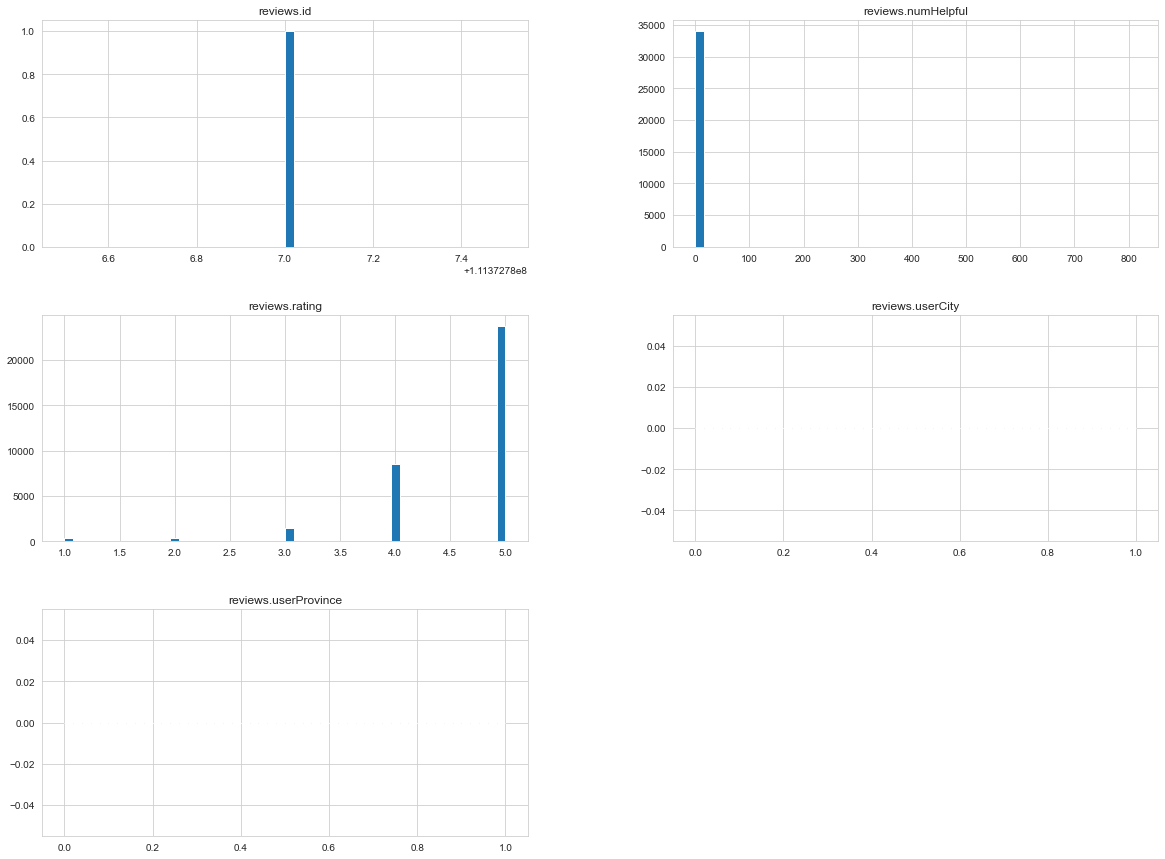

In [15]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Outlliers are important , we want to weight the reviews that were more helpful

## Split the data into Train and Test

In [17]:
## majority of reviews are 5 , so we have to make an evenly separated sets


from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))


dataAfter = data.dropna(subset=["reviews.rating"])
## removes all the null values

print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)


split = StratifiedShuffleSplit(n_splits= 5, test_size = 0.2)




for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]):
    strat_train =  dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Before 34660
After 34627


In [18]:
##checking the data set

print(len(strat_train))
print(len(strat_test))
print(strat_test["reviews.rating"].value_counts()/len(strat_test))

27701
6926
5.0    0.685244
4.0    0.250650
3.0    0.041294
1.0    0.010973
2.0    0.010829
Name: reviews.rating, dtype: float64


## Data Exploration

In [20]:
reviews = strat_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
28069,AVpfl8cLLJeJML43AE3S,NaN,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-09-09T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,One of the best purchases I've ever made! It's...,More than just a speaker,NaN,NaN,Nichs
25144,AVpfl8cLLJeJML43AE3S,Amazon - Amazon Tap Portable Bluetooth and Wi-...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-12-24T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,"I love Alexa!!! Music, books, facts, games,chr...",Fun gift,NaN,NaN,vivk
12052,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-06-03T00:00:00.000Z,2017-05-21T03:03:09Z,"2017-04-30T00:21:00.000Z,2017-06-07T08:18:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I got a Great price for an 8g Amazon Fire tabl...,Great price for an 8g Amazon Fire tablet,NaN,NaN,SpeedyJ
23643,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-21T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Works great even from a different room it resp...,Awesome!,NaN,NaN,Bevp
27878,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-08T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Responses well and there are lots of skills to...,Fun product,NaN,NaN,Dave


In [21]:
print(len(reviews["name"].unique()), len(reviews["asins"].unique()))
print(reviews.info())
print(reviews.groupby("asins")["name"].unique())

48 34
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 28069 to 30126
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27675 non-null  object 
 1   name                  22282 non-null  object 
 2   asins                 27673 non-null  object 
 3   brand                 27675 non-null  object 
 4   categories            27675 non-null  object 
 5   keys                  27675 non-null  object 
 6   manufacturer          27675 non-null  object 
 7   reviews.date          27653 non-null  object 
 8   reviews.dateAdded     19199 non-null  object 
 9   reviews.dateSeen      27675 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27243 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27291 non-null  float64
 14  reviews.rating        27675 non-null  float64
 15  reviews.s

In [22]:
## the different names for the specific product that have 2 ASINs

different_names = reviews[reviews["asins"] ==
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)
print(reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts())

nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Echo (White),,,
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Tangerine"
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Re

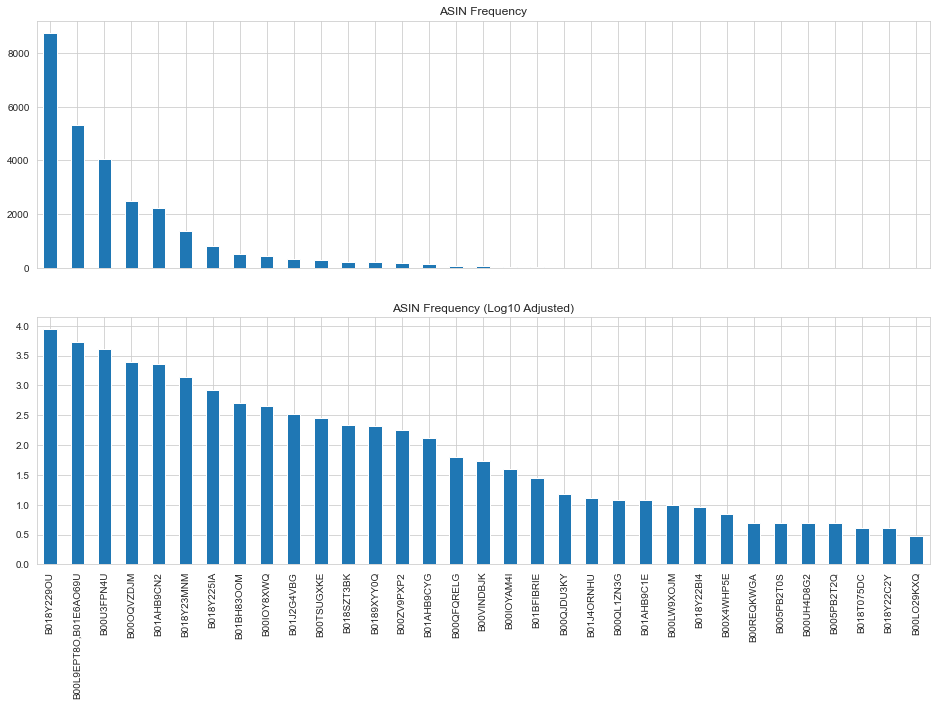

In [25]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
plt.show()

## Entire training dataset avg rating

4.58453477868112


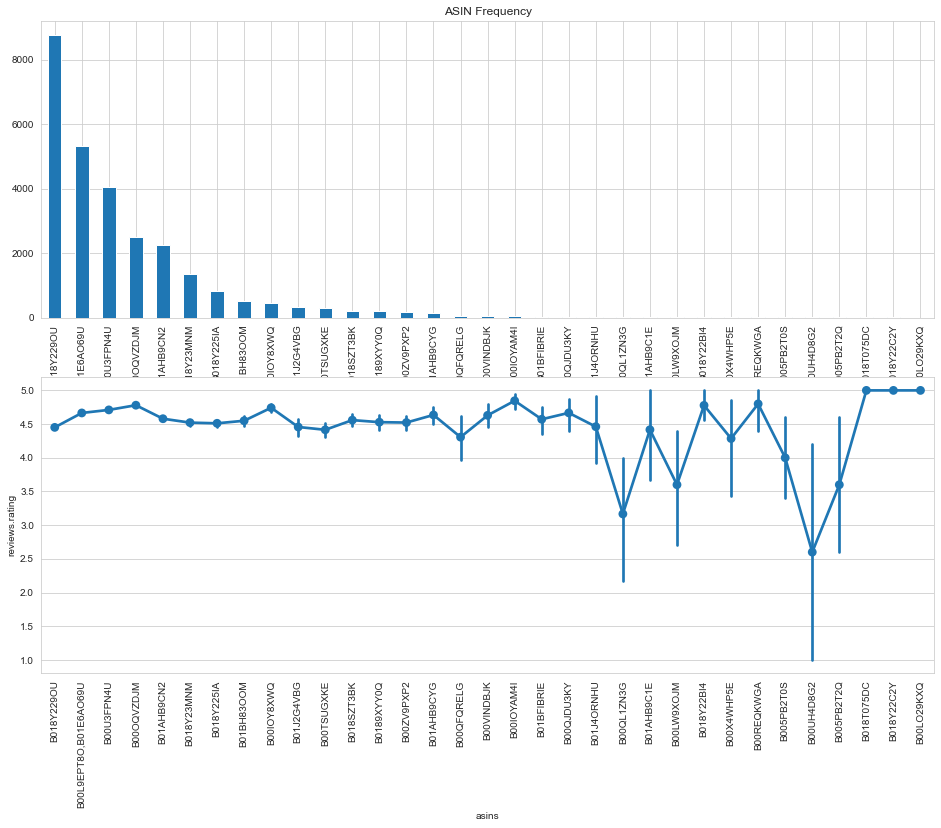

In [26]:
print(reviews["reviews.rating"].mean())

asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

## Sentiment Analysis

In [28]:
# we will build a classifier that can determine review's sentiment

def sentiments(rating):
    if (rating == 5) or (rating== 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
    
    
## add the sentiments
strat_train["sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["sentiment"] = strat_test["reviews.rating"].apply(sentiments)
print(strat_train["sentiment"][:20])

28069    Positive
25144    Positive
12052    Positive
23643    Positive
27878    Positive
30424    Positive
26630    Positive
9888     Positive
29275    Positive
4631     Positive
9733     Positive
21215    Positive
8852      Neutral
18387    Positive
10795    Positive
3938     Positive
5256     Positive
18288    Positive
23776    Positive
26600    Positive
Name: sentiment, dtype: object
